In [33]:
%matplotlib inline

# 다항 분포 나이브 베이즈 모형

실수를 사용해도 상관이 없다

In [7]:
from sklearn.datasets import load_digits
from sklearn.naive_bayes import MultinomialNB

In [2]:
digits = load_digits()

In [4]:
X = digits.data
y = digits.target

In [8]:
model = MultinomialNB().fit(X, y)

In [9]:
model.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
model.class_count_

array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.])

In [12]:
fc = model.feature_count_
fc

array([[0.000e+00, 4.000e+00, 7.450e+02, 2.331e+03, 2.011e+03, 5.210e+02,
        6.000e+00, 0.000e+00, 0.000e+00, 1.580e+02, 2.239e+03, 2.380e+03,
        2.046e+03, 2.025e+03, 1.720e+02, 0.000e+00, 0.000e+00, 6.640e+02,
        2.541e+03, 9.370e+02, 3.740e+02, 2.166e+03, 6.270e+02, 0.000e+00,
        0.000e+00, 9.420e+02, 2.263e+03, 3.550e+02, 2.500e+01, 1.613e+03,
        1.148e+03, 0.000e+00, 0.000e+00, 1.045e+03, 2.057e+03, 1.590e+02,
        8.000e+00, 1.562e+03, 1.268e+03, 0.000e+00, 0.000e+00, 6.220e+02,
        2.365e+03, 2.940e+02, 2.730e+02, 2.013e+03, 1.042e+03, 0.000e+00,
        0.000e+00, 1.420e+02, 2.324e+03, 1.773e+03, 1.842e+03, 2.359e+03,
        4.300e+02, 0.000e+00, 0.000e+00, 1.000e+00, 7.400e+02, 2.414e+03,
        2.372e+03, 9.680e+02, 4.900e+01, 0.000e+00],
       [0.000e+00, 2.000e+00, 4.470e+02, 1.676e+03, 1.894e+03, 1.106e+03,
        1.810e+02, 0.000e+00, 0.000e+00, 1.700e+01, 7.400e+02, 2.323e+03,
        2.538e+03, 1.537e+03, 2.190e+02, 0.000e+00, 2.000e+

In [14]:
theta = np.exp(model.feature_log_prob_)
theta

array([[1.77056959e-05, 8.85284796e-05, 1.32084492e-02, 4.12896829e-02,
        3.56238602e-02, 9.24237327e-03, 1.23939871e-04, 1.77056959e-05,
        1.77056959e-05, 2.81520565e-03, 3.96607589e-02, 4.21572620e-02,
        3.62435596e-02, 3.58717399e-02, 3.06308539e-03, 1.77056959e-05,
        1.77056959e-05, 1.17742878e-02, 4.50078790e-02, 1.66079428e-02,
        6.63963597e-03, 3.83682431e-02, 1.11191770e-02, 1.77056959e-05,
        1.77056959e-05, 1.66964713e-02, 4.00856956e-02, 6.30322775e-03,
        4.60348094e-04, 2.85769932e-02, 2.03438446e-02, 1.77056959e-05,
        1.77056959e-05, 1.85201579e-02, 3.64383222e-02, 2.83291135e-03,
        1.59351263e-04, 2.76740027e-02, 2.24685281e-02, 1.77056959e-05,
        1.77056959e-05, 1.10306486e-02, 4.18916766e-02, 5.22318030e-03,
        4.85136068e-03, 3.56592716e-02, 1.84670408e-02, 1.77056959e-05,
        1.77056959e-05, 2.53191452e-03, 4.11657430e-02, 3.14099046e-02,
        3.26315976e-02, 4.17854424e-02, 7.63115494e-03, 1.770569

# 뉴스 그룹 분류

만약 x 값이 실수 변수, 1/0 값을 가지는 변수, 일정 변수 집합이 특정한 분포를 이루는 변수들이 섞여 있다면 어떻게 풀어야 하는가?

# 나이브 베이즈 분류 모형을 이용한 감성 분석

# 엔트로피

## 엔트로피의 정의

# 의사 결정 나무

# Scikit-Learn의 의사 결정 나무 클래스
 - DecisionTreeRegressor 도 가능

In [15]:
from sklearn.datasets import load_iris

In [34]:
iris = load_iris()
X = iris.data[:, [0, 3]]
y = iris.target

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import io
from IPython.core.display import Image 
tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0).fit(X,y)

In [36]:
def draw_decision_tree(model):
    dot_buf = io.StringIO() 
    export_graphviz(model, out_file=dot_buf, feature_names=iris.feature_names[2:])
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0] 
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    
    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], s=80, label=cl)

    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)
    
    return Z

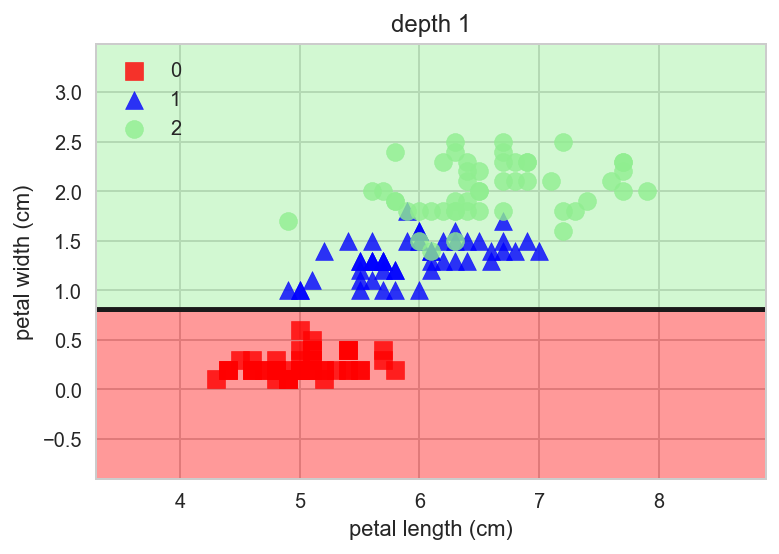

In [37]:
plot_decision_regions(X, y, tree1, "depth 1")
plt.show()

# 모형 결합의 기초
 - overfitting 방지
 - 성능이 좋아지는 경우가 있다.
 - 취합 방법론 : 똑같은 문제를 풀고, 취합
  - 다수결
  - 배깅
  - 랜덤 포레스트
 - 부스팅 방법론: 모델들의 목표가 서로 다르다. 역할을 분담해서 문제 해결
 

## 다수결 방법
 - hard voting
 - soft voting

## 모형 결합을 사용한 성능 향상
 - 모델이 독립적이어야 한다. (모델의 답들이 달라야 한다.)
 - weak classifier라도 50점 이상의 성능은 나와야 한다.
 - 하나하나의 모델을 만들 때 대강 만들고, aggregation해서 성능을 좋게 만들자.

## 배깅
 - pasting
 - bagging
 - random subspaces
 - random patches

## 랜덤 포레스트
 - Decision Tree를 개별 모형으로 사용하는 모형 결합 방법
 - 노드별로 다른 독립변수를 사용할 수 있다.
 - extremly randomized trees이 아닌 경우 맨 앞의 노드는 항상 같은 독립변수가 뽑힌다.
 - extremly randomized tree에서 feature importance를 뽑을 수 있다.